perintah yang di butuhkan 


In [1]:



pip install pandas numpy scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. import library yang di butuhkan 


In [2]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

2. load dataset


In [3]:
# Inisialisasi model Logistic Regression
model = LogisticRegression()

In [4]:
# Load dataset
df = pd.read_csv('diabetes.csv')

# Tampilkan beberapa baris data
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Membaca dataset 
file_path = "diabetes.csv" 
data = pd.read_csv(file_path)
# Menampilkan beberapa baris data 
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


3. Pisahkan Fitur dan label

In [14]:
# Pisahkan fitur dan label
X = df.drop(columns='Outcome')  # Fitur (8 kolom pertama)
y = df['Outcome']  # Target (kolom 'Outcome')

#Tampilkan bentuk (shape) dari fitur dan label
print("Shape fitur (X):", X.shape)
print("Shape label (y):", y.shape)



Shape fitur (X): (768, 8)
Shape label (y): (768,)


In [27]:
model = LogisticRegression(max_iter=500)  # Tambahkan max_iter
model = LogisticRegression(solver='liblinear', max_iter=1000)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy (Cross-Validation):", cv_scores.mean())

Cross-Validation Scores: [0.75974026 0.75324675 0.75974026 0.80392157 0.76470588]
Mean Accuracy (Cross-Validation): 0.768270944741533


4. split data testing 

In [17]:
# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran data
print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (614, 8)
Testing data: (154, 8)


In [18]:
# Standardisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)


5. Inisialisasi dan Latih Logistic Regression

In [19]:
# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Latih model
model.fit(X_train, y_train)



LogisticRegression()

evaluasi model logistic regression


In [20]:
# Pastikan model sudah di-fit dengan data latih
y_pred = model.predict(X_test)


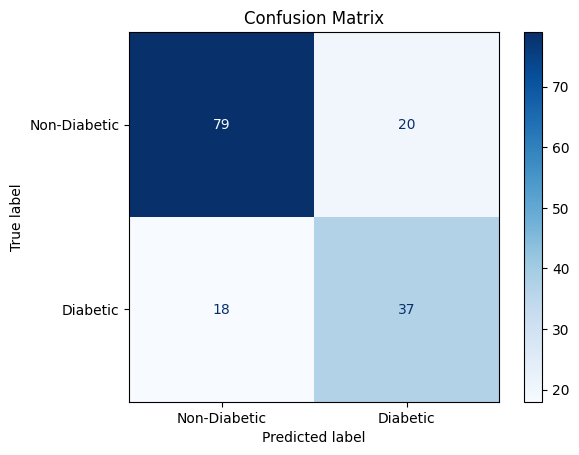

In [21]:
# Visualisasi Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Non-Diabetic', 'Diabetic'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

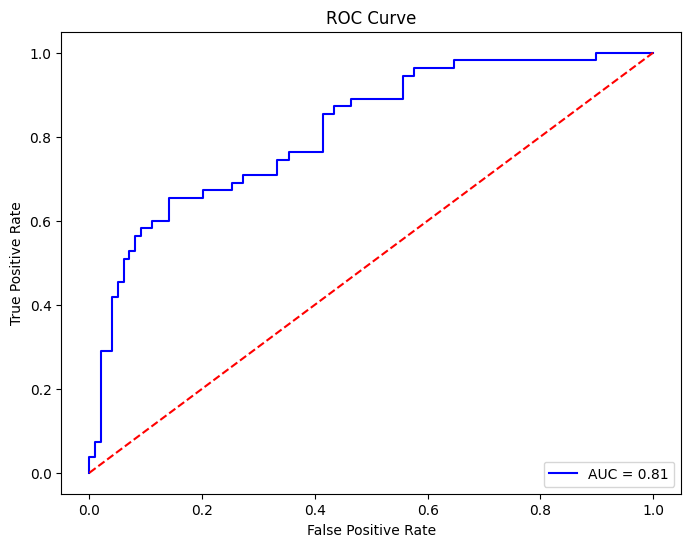

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung probabilitas prediksi
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Garis diagonal sebagai baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


6. Prediksi Data Testing

In [28]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [29]:
# Prediksi data testing
y_pred = model.predict(X_test)


7. Evaluasi Akurasi

In [30]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Akurasi Logistic Regression:", accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi Logistic Regression: 0.7532467532467533

Confusion Matrix:
[[79 20]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [31]:
# One-hot encoding pada fitur kategori
X = pd.get_dummies(X, drop_first=True)
print(pd.get_dummies(X, drop_first=True))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [32]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Lanjutkan proses dengan X_scaled
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
# Tentukan parameter yang akan diuji
model = LogisticRegression(max_iter=500)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],  # Penalti yang didukung oleh solver 'liblinear' dan 'lbfgs'
}
log_reg = LogisticRegression(penalty='l2', C=1.0)

# Lakukan Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)
print("Akurasi terbaik pada training data:", grid_search.best_score_)

# Gunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_


Parameter terbaik: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Akurasi terbaik pada training data: 0.7655071304811408


In [33]:
# Inisialisasi model Logistic Regression
logreg = LogisticRegression(max_iter=1000)

In [34]:
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [35]:
# Latih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [36]:
# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [37]:
# Model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

In [38]:
# Evaluasi model terbaik
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [39]:
# Hasil evaluasi
print("Akurasi Logistic Regression dengan GridSearchCV:", accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi Logistic Regression dengan GridSearchCV: 0.7532467532467533

Confusion Matrix:
[[79 20]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [44]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")

# Hitung precision, recall, dan F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Akurasi: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Akurasi: 0.7532
Akurasi: 0.7532
Precision: 0.6491
Recall: 0.6727
F1-Score: 0.6607

Confusion Matrix:
[[79 20]
 [18 37]]


In [45]:
from sklearn.metrics import classification_report

# Tampilkan classification report untuk metrik lainnya
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



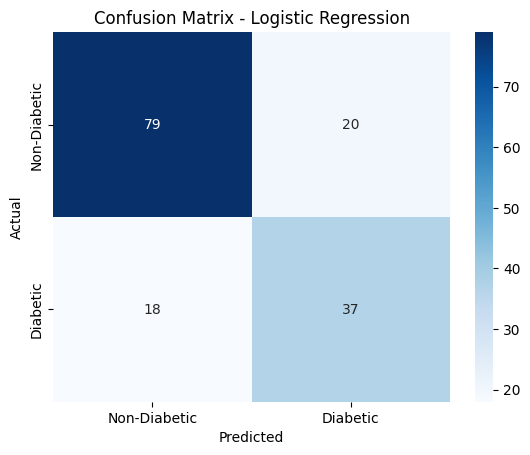

In [46]:
# Visualisasi Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [50]:
import streamlit as st
if st.button('Prediksi dengan Logistic Regression'):
            input_data = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]], 
                                       columns=X.columns)
            prediction = lr_model.predict(input_data)
            
            if prediction[0] == 1:
                st.success("Hasil Prediksi: Diabetes")
            else:
                st.success("Hasil Prediksi: Tidak Diabetes")

2025-01-29 17:34:11.405 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-29 17:34:11.412 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-29 17:34:11.415 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-29 17:34:11.417 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-29 17:34:11.876 
  command:

    streamlit run c:\Users\Administrator\Desktop\Logitic Regression\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-29 17:34:11.878 Thread 'MainThread': missing ScriptRunContext! Thi